In [1]:
# Description: This Progrm uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 6o day stock prise.

In [2]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Using TensorFlow backend.


In [3]:
# Get the stock quote
df = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2020-12-17")
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.227356
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.598289
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.689186


In [4]:
# Get the number of rows and columns in the data set
df.shape

(2256, 6)

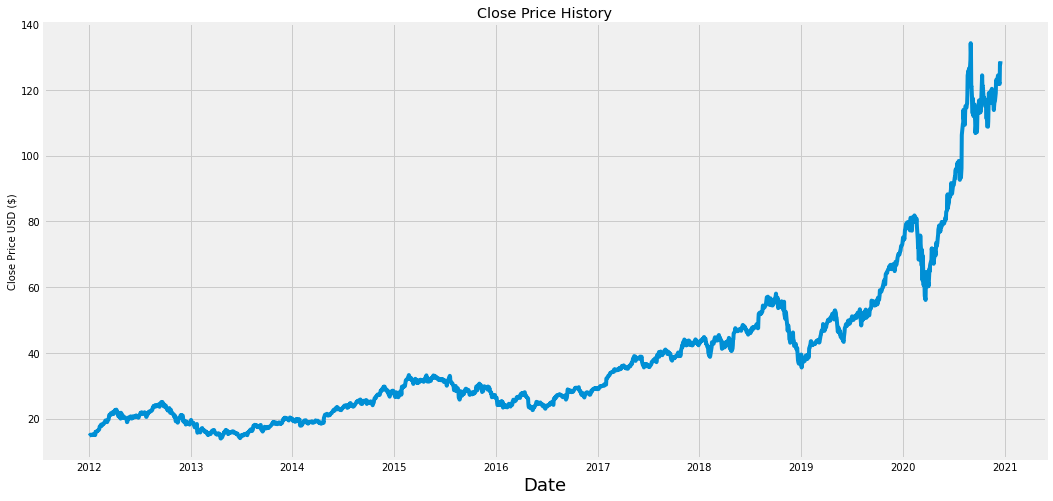

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=10)
plt.show()

In [6]:
# Create new dataframe with only "Close" column.
data = df.filter(["Close"])
# Convert the dataframe into a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1805

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680526],
       [0.00816869],
       ...,
       [0.94760156],
       [0.94701935],
       [0.95442167]])

In [8]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00884298, 0.01095496, 0.00887566,
       0.01667305, 0.01607006, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182525, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512387,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499022, 0.04593482, 0.04796363, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.0639921 , 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]



In [9]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1745, 60, 1)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))




Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
# train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/1





1745/1745 [==============================] - 143s 82ms/step - loss: 3.1728e-04


In [14]:
# Create the testing data set
# Create a new array containing scaled values from 224 to 279
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [16]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [17]:
# Get the model predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

7.599823759294666

C:\Users\himanshu.manjarawala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


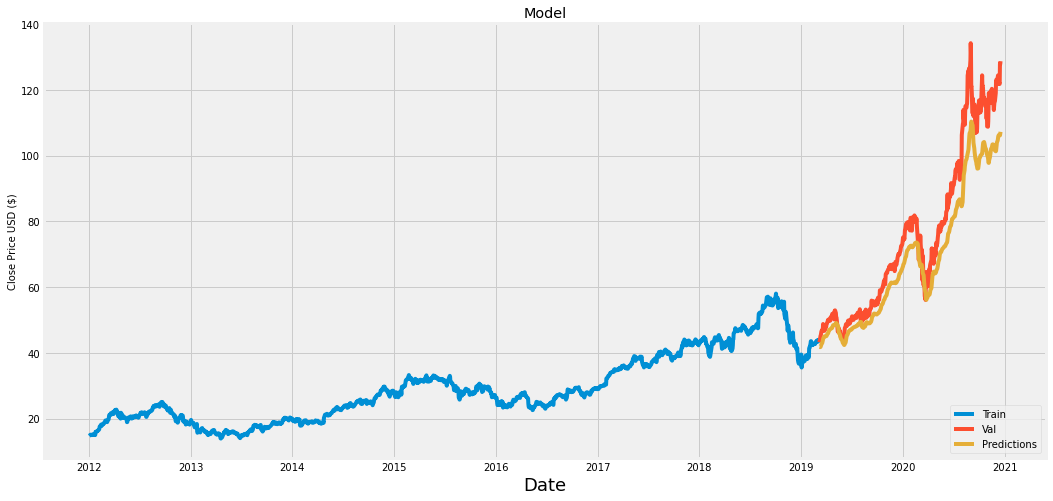

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=10)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [20]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-08,43.227501,41.807755
2019-03-11,44.724998,41.747864
2019-03-12,45.227501,41.830788
2019-03-13,45.427502,42.033810
2019-03-14,45.932499,42.299892
...,...,...
2020-12-11,122.410004,106.258987
2020-12-14,121.779999,106.269119
2020-12-15,127.879997,106.140503


In [21]:
# Get the quote
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2020-12-17")
# Create a new dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[107.97453]]


In [23]:
apple_quote1 = web.DataReader("HUL", data_source="yahoo", start="2020-12-18", end="2020-12-18")
print(apple_quote1["Close"])

C:\Users\himanshu.manjarawala\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\himanshu.manjarawala\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


RemoteDataError: No data fetched for symbol HUL using YahooDailyReader